In [5]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn import *
import pickle
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mm12574/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mm12574/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
df = pd.read_csv('five_movies.csv',index_col=0)

In [12]:
df.head()

,productId,userId,score,summary,review,movie_title
111469,B002LBKDYE,A1D3RZRRITKB75,5.0,If you eat you need to watch it.,Seriously ----watch this before you take that ...,"Food, Inc"
111470,B002LBKDYE,A24Y3JBTJD5R1K,5.0,For those who eat food!,"I don't know that my eating habits changed, bu...","Food, Inc"
111471,B002LBKDYE,ABND7UR0H37JW,5.0,"if you're a parent, don't miss this","Well worth the time, this engrossing and enlig...","Food, Inc"
111472,B002LBKDYE,A3EK4NS9CMXC7W,5.0,"I'm not an activist, but I do want to live a ...",When movies like this come out I am often hesi...,"Food, Inc"
111473,B002LBKDYE,A1LIDERT7U0NN8,5.0,Well Worth Your Time,I am always hesitant to watch certain document...,"Food, Inc"


In [8]:
df.shape

(4366, 6)

In [24]:
iron_man['is_duplicate'] = iron_man.review.duplicated(keep='first')

In [25]:
iron_man.head()

,productId,userId,score,summary,review,is_duplicate
517024,B001FZ9AAU,A10RMS4T6P76M4,5.0,"Excellent, action packed, and fun!",I really enjoyed this movie. Robert Downey Jr...,False
517025,B001FZ9AAU,A2JEONEOLE4FD2,5.0,Ironman proves there are heroes beyond Spidey...,This is a great entertainer done very well. Bu...,False
517026,B001FZ9AAU,A3LH77PBDFEO3F,5.0,Guilty Pleasue of a movie!,"I have never been a comic book guy, and super ...",False
517027,B001FZ9AAU,A6BRC4D9NZJFK,5.0,highly recommended,how can you not love this movie<br />excellent...,False
517028,B001FZ9AAU,A2C62X7R904NKM,4.0,Robert Downey Jr. actually does it as a super...,I think that movie makers have to wait till th...,False


In [26]:
iron_man.is_duplicate.value_counts()

True     7398
False     924
Name: is_duplicate, dtype: int64

In [27]:
iron_man = iron_man[iron_man.is_duplicate == False]

In [28]:
iron_man.shape

(924, 6)

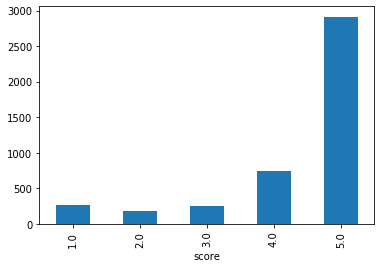

In [13]:
df.groupby('score').review.count().plot.bar(ylim=0)
plt.show()


In [14]:
stop_words = stopwords.words('english') + list(string.punctuation)
stemmer = PorterStemmer()
df['cleaned'] = df['review'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in stop_words]).lower())

In [15]:
df.head()

,productId,userId,score,summary,review,movie_title,cleaned
111469,B002LBKDYE,A1D3RZRRITKB75,5.0,If you eat you need to watch it.,Seriously ----watch this before you take that ...,"Food, Inc",serious watch take next bite br do realli want...
111470,B002LBKDYE,A24Y3JBTJD5R1K,5.0,For those who eat food!,"I don't know that my eating habits changed, bu...","Food, Inc",i know eat habit chang i defiantli becam infor...
111471,B002LBKDYE,ABND7UR0H37JW,5.0,"if you're a parent, don't miss this","Well worth the time, this engrossing and enlig...","Food, Inc",well worth time engross enlighten film open ey...
111472,B002LBKDYE,A3EK4NS9CMXC7W,5.0,"I'm not an activist, but I do want to live a ...",When movies like this come out I am often hesi...,"Food, Inc",when movi like come i often hesit watch i acti...
111473,B002LBKDYE,A1LIDERT7U0NN8,5.0,Well Worth Your Time,I am always hesitant to watch certain document...,"Food, Inc",i alway hesit watch certain documentari mani m...


In [24]:
df['cleaned'].head()

111469    serious watch take next bite br do realli want...
111470    i know eat habit chang i defiantli becam infor...
111471    well worth time engross enlighten film open ey...
111472    when movi like come i often hesit watch i acti...
111473    i alway hesit watch certain documentari mani m...
Name: cleaned, dtype: object

In [25]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(df['cleaned']).toarray()
final_features.shape

(4366, 20349)

In [27]:
#first we split our dataset into testing and training set:
# this block is to split the dataset into training and testing set 
X = df['cleaned']
Y = df['score']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [28]:
X_train.head()

4028380    iron man jon favreau br br wait jon favreau di...
111930     thi video requir view school it tell sad truth...
4942673    the kid love harri potter grown so cours see f...
809556     that son would love kid and let face film seem...
4027943    thi must watch theatr iron man qualiti made ex...
Name: cleaned, dtype: object

In [29]:
X_test.head()

809555     i order car dvd year old grandson favorit movi...
809341     thi must collect i even like movi much i think...
111469     serious watch take next bite br do realli want...
4028369    i realli love movi big fight end robert downey...
809638     what great movi children adult alik thi one ev...
Name: cleaned, dtype: object

In [30]:
y_train.head()

4028380    4.0
111930     5.0
4942673    5.0
809556     4.0
4027943    5.0
Name: score, dtype: float64

In [31]:
y_test.head()

809555     3.0
809341     5.0
111469     5.0
4028369    4.0
809638     5.0
Name: score, dtype: float64

In [32]:
# instead of doing these steps one at a time, we can use a pipeline to complete them all at once
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', RandomForestClassifier())])

In [33]:
# fitting our model and save it in a pickle for later use
model = pipeline.fit(X_train, y_train)
with open('RandomForest.pickle', 'wb') as f:
    pickle.dump(model, f)
ytest = np.array(y_test)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [34]:
ytest[:50]

array([3., 5., 5., 4., 5., 4., 5., 3., 4., 4., 5., 5., 5., 5., 5., 5., 3.,
       4., 5., 5., 5., 5., 5., 5., 5., 5., 1., 5., 5., 3., 5., 5., 5., 5.,
       4., 5., 3., 1., 1., 4., 4., 5., 4., 5., 4., 4., 4., 5., 3., 5.])

In [35]:
# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.67      0.18      0.29        76
         2.0       0.00      0.00      0.00        41
         3.0       0.38      0.05      0.08        65
         4.0       0.26      0.13      0.17       198
         5.0       0.69      0.94      0.79       712

    accuracy                           0.65      1092
   macro avg       0.40      0.26      0.27      1092
weighted avg       0.57      0.65      0.57      1092



In [66]:
print(confusion_matrix(ytest, model.predict(X_test)))

[[  2   0   0   0   7]
 [  0   0   0   1   5]
 [  0   0   0   2  10]
 [  0   0   0   8  48]
 [  0   0   0  13 135]]
